In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [30]:
J_V_ratios = np.linspace(-3,3,10000)
V = -1
mu_V_ratio = 0

N = 2
M = 5 

energies = []
eigenkets = []

for J_V_ratio in J_V_ratios:
    hamiltonian = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio, J_V_ratio)
    eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
    
    energies.append(eigenvalues)
    eigenkets.append(eigenvectors)

energies = np.array(energies)

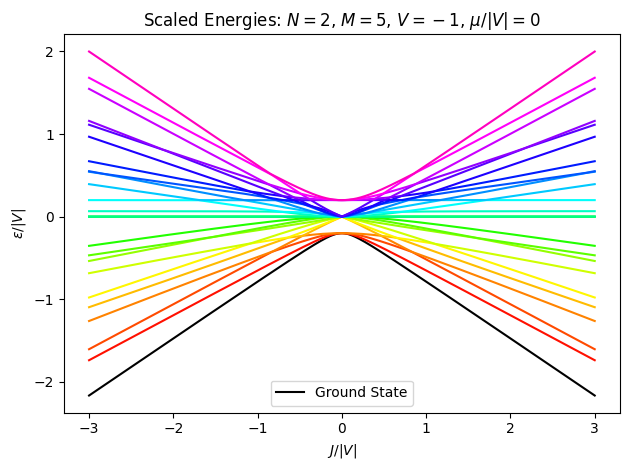

In [31]:
fig, ax = plt.subplots()
colors = get_cmap("gist_rainbow", M**N)
for idx in range(M**N):
    if idx == 0:
        ax.plot(J_V_ratios, energies[:,idx]/M, color = "k", label = "Ground State")
    else:
        ax.plot(J_V_ratios, energies[:,idx]/M, color = colors(idx))
ax.set_xlabel("$J/|V|$")
ax.set_ylabel("$\epsilon/|V|$")
ax.set_title(f"Scaled Energies: $N = {N}$, $M = {M}$, $V={V}$, $\mu/|V| = {mu_V_ratio}$")
ax.legend(loc = "lower center")
fig.tight_layout()